# Pandas
* 설치 : cmd창에서 pip install pandas 실행
* 교재에는 없는 내용, 데이터 사이언스 스쿨 파이썬 4장 참고

# Series
* pd.Series()
* 순차적으로 나열된 1차원 배열 형태
* 딕셔너리 형태와 비슷 (key, value)
* 딕셔너리, 리스트 등도 Series로 바꿀 수 있음
* Series가 여러개 붙으면 DataFrame

In [ ]:
import pandas as pd
#panel datas의 약자

In [ ]:
dict_data = {"a":1, "b":2, "c":3}
sr_dic = pd.Series(dict_data) # 딕셔너리를 시리즈 형태로 변환

print(dict_data)
print(sr_dic)

{'a': 1, 'b': 2, 'c': 3}
a    1
b    2
c    3
dtype: int64


In [ ]:
print(type(dict_data))
print(type(sr_dic))

<class 'dict'>
<class 'pandas.core.series.Series'>


In [ ]:
idx_dic = sr_dic.index
val_dic = sr_dic.values

print(idx_dic)
print(val_dic)

Index(['a', 'b', 'c'], dtype='object')
[1 2 3]


In [ ]:
list_data = ['2018-01-01', 3.14, 'abc', 100, True]
sr_lst=pd.Series(list_data)

print(list_data)
print(sr_lst)

# 리스트는 키값이 없어 시리즈로 변환시 0부터 인덱스 값이 자동으로 생성됨

['2018-01-01', 3.14, 'abc', 100, True]
0    2018-01-01
1          3.14
2           abc
3           100
4          True
dtype: object


In [ ]:
idx_lst = sr_lst.index
val_lst = sr_lst.values

print(idx_lst)
print(val_lst)

RangeIndex(start=0, stop=5, step=1)
['2018-01-01' 3.14 'abc' 100 True]


In [ ]:
print(type(idx))
print(type(val)) # 값들은 넘파이 배열 형태

<class 'pandas.core.indexes.range.RangeIndex'>
<class 'numpy.ndarray'>


In [ ]:
tup_data = ('영인','2010-05-01', '여', True)
# 튜플 형태도 리스트처럼 기본 인덱스 값이 0부터 자동으로 생성됨
# 인덱스 값을 기본값이 아닌 직접 지정해 줄 수 있음 (리스트도 동일)
# index 지정 시 리스트 형태로 넣어줌

sr_tup = pd.Series(tup_data, index=['이름','생년월일','성별','학생여부'])
print(sr_tup)

이름              영인
생년월일    2010-05-01
성별               여
학생여부          True
dtype: object


In [ ]:
# 원소를 1개 선택하는 2가지 방식
print(sr_tup[0]) # sr의 1번째 원소를 선택 (정수형 위치 인덱스를 활용)
print(sr_tup['이름']) #'이름'라벨을 가진 원소를 선택(인덱스 이름을 활용)

영인
영인


In [ ]:
# 여러개 원소 선택하는 2가지 방법
# 여러개의 원소를 가져올때는 리스트 형태로 넣어줘야함 (즉, 대괄호 두개)
print(sr_tup[[1,2]])
print(sr_tup[["생년월일","성별"]])

생년월일    2010-05-01
성별               여
dtype: object
생년월일    2010-05-01
성별               여
dtype: object


## 시리즈 생성 실습

In [ ]:
# 1. 시리즈 만들기
#  서울     부산     인천     대구
# 9904312, 3448737, 2890451, 2466052

sr = pd.Series([9904312,3448737,2890451,2466052], index=["서울","부산","인천","대구"])
print(sr)

서울    9904312
부산    3448737
인천    2890451
대구    2466052
dtype: int64


In [ ]:
# 2. 인덱싱 부산 2가지 방식

print(sr[1])
print(sr["부산"])

3448737
3448737


In [ ]:
# 3. 부산과 대구 인덱싱 2가지 방식

print(sr[[1,3]])
print(sr[["부산","대구"]])

부산    3448737
대구    2466052
dtype: int64
부산    3448737
대구    2466052
dtype: int64


In [ ]:
for key, value in sr.items():
  print(f'key는{key}이고 value는 {value}다')

key는서울이고 value는 9904312다
key는부산이고 value는 3448737다
key는인천이고 value는 2890451다
key는대구이고 value는 2466052다


In [ ]:
# 시리즈는 넘파이 1차원 배열로 변환된다.
sr/100000

서울    99.04312
부산    34.48737
인천    28.90451
대구    24.66052
dtype: float64

In [ ]:
# 딕셔너리는 아래와 같은 연산이 안됨
dict_sr = {"서울":999999, "부산":333333}
dict_sr/1000

TypeError: ignored

In [ ]:
sr2 = pd.Series({'서울':9631482, '부산':3393191, '인천':2632035, '대전':1490158})
sr = pd.Series([9904312,3448737,2890451,2466052], index=["서울","부산","인천","대구"])

# 인덱스 값이 다른 데이터는 연산이 되지만 잘 안된다.
# 연산이 안되는 것의 결과는 NaN(Not a Number, 결측치)값을 반환
# np.nan 데이터 타입은 실수 float

ds = sr - sr2
print(ds)

대구         NaN
대전         NaN
부산     55546.0
서울    272830.0
인천    258416.0
dtype: float64


In [ ]:
print(ds.index)
print(ds.values)

Index(['대구', '대전', '부산', '서울', '인천'], dtype='object')
[    nan     nan  55546. 272830. 258416.]


In [ ]:
# 엘러먼트의 개수를 세는 method
print(sr.count())
print(sr2.count())

4

In [ ]:
print(ds.count()) # nan은 개수로 치지 않는다.

3


In [ ]:
# 카테고리 의 값 세는 method
sr.value_counts()

9904312    1
3448737    1
2890451    1
2466052    1
dtype: int64

In [ ]:
# 패키지 설치
!pip install seaborn # 시각화를 연습하라고 기본 데이터가 패키지 안에 내장되어있음

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import seaborn as sns
iris = sns.load_dataset('iris')
print(iris)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


In [ ]:
# 값을 세는 method 예시
# value_counts()

iris['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [ ]:
# 카테고리형 자료의 종류의 개수를 알려주는 메소드
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
# 인구데이터의 전체 합과 평균
sr = pd.Series([9904312,3448737,2890451,2466052], index=["서울","부산","인천","대구"])
sr.sum(), sr.mean()

(18709552, 4677388.0)

In [ ]:
# 정렬메소드
sr.sort_values() # default ascending = True 오름차순

대구    2466052
인천    2890451
부산    3448737
서울    9904312
dtype: int64

In [ ]:
sr.sort_values(ascending=False) # 내림차순

서울    9904312
부산    3448737
인천    2890451
대구    2466052
dtype: int64

In [ ]:
# 주피터 노트북에서 인자 확인할 때 shift + tab 누르면 확인 가능
# 코랩에서는 괄호속에 마우스 갖다대기

# DataFrame

In [ ]:
#  열이름을 key, 리스트를 value로 갖는 딕셔너리의 정의 (2차원 배열)

dict_data = {'c0':[1,2,3],'c1':[4,5,6],'c2':[7,8,9],'c3':[10,11,12],'c4':[13,14,15]}

df = pd.DataFrame(dict_data)
print(type(df))
print(df)

<class 'pandas.core.frame.DataFrame'>
   c0  c1  c2  c3  c4
0   1   4   7  10  13
1   2   5   8  11  14
2   3   6   9  12  15


In [ ]:
# 리스트에 행인덱스 열 이름을 지정하여 데이터 프레임 만들기
df = pd.DataFrame([[15,'남','신촌중'],[17,'여','연세중']], 
                  index = ['준서','예은'],
                  columns = ["나이", "성별", "학교"])

# 행 인데스, 열이름 확인하기
print(df)
print(df.index) # 인덱스 이름
print(df.columns) # 열 이름

    나이 성별   학교
준서  15  남  신촌중
예은  17  여  연세중
Index(['준서', '예은'], dtype='object')
Index(['나이', '성별', '학교'], dtype='object')


In [ ]:
# 인덱스 값과 열 이름 변경
df.columns = ["연령","남여","소속"]
print(df)

df.index = ["학생1", "학생2"]
print(df)

    연령 남여   소속
준서  15  남  신촌중
예은  17  여  연세중
     연령 남여   소속
학생1  15  남  신촌중
학생2  17  여  연세중


In [ ]:
# 메소드를 사용해서 행과 열이름 변경
df = pd.DataFrame([[15, '남', '신촌중'],[17, '여', '연세중']],
                 index=['준서', '예은'],
                 columns=['나이', '성별', '학교'])

df.rename(columns={'나이':'연령', '성별':'남여', '학교':'소속'}, inplace=True)
df

,연령,남여,소속
준서,15,남,신촌중
예은,17,여,연세중


In [ ]:
df.rename(index={'준서':'학생1', '예은':'학생2'}, inplace=True)
df

,연령,남여,소속
학생1,15,남,신촌중
학생2,17,여,연세중


In [ ]:
data ={'국어':[80,90,70,30], '영어':[90,70,60,40], '수학':[90,60,80,70]}
# 춘향, 몽룡, 향단, 방자

In [ ]:
df1 = pd.DataFrame(data, index=["춘향","몽룡","향단","방자"])
df1

,국어,영어,수학
춘향,80,90,90
몽룡,90,70,60
향단,70,60,80
방자,30,40,70


In [ ]:
# indexing으로 몽룡의 국어점수 뽑아보기
df1['국어']['몽룡'] # 열 인덱스 먼저 선택, 그 이후 행 인덱스 선택

90

In [ ]:
# numpy random.randint를 사용해서 60~100 사이 12개 숫자를 만들고
# reshape하고 index가 James, maria, brian, alice를 만들고
# 컬럼이름은 kor, eng, math로 된 데이터 프레임을 생성하기

import numpy as np

np.random.seed(2023)

df2 = pd.DataFrame(np.random.randint(60,100,12).reshape(4,3),
                   index=["James", "maria" ,"brian", "alice"],
                   columns=["kor","eng","math"])
df2

,kor,eng,math
James,83,85,66
maria,93,88,63
brian,82,97,92
alice,82,77,73


In [ ]:
# csv 파일 만들기
%%writefile sample.csv
c1,c2,c3
1,1.15,one
2,2.23,two
3,3.32,three

Overwriting sample.csv


In [ ]:
# 파일로 읽을 때
df = pd.read_csv('sample.csv') # 해당 파일이 같은 공간에 없으면 경로 지정 "c:/sample.csv"
df

,c1,c2,c3
0,1,1.15,one
1,2,2.23,two
2,3,3.32,three


In [ ]:
df2 = df[:] # 변수 복사
df2

,c1,c2,c3
0,1,1.15,one
1,2,2.23,two
2,3,3.32,three


In [ ]:
df2.drop(1, inplace = True) # 두번째 행 지우고 바로 적용
df2

<ipython-input-99-907cd432c191>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(1, inplace = True) # 두번째 행 지우고 바로 적용


,c1,c2,c3
0,1,1.15,one
2,3,3.32,three


In [ ]:
df3 = pd.DataFrame(np.random.randint(60,100,12).reshape(4,3),
                   index=["James", "maria" ,"brian", "alice"],
                   columns=["kor","eng","math"])
df3

,kor,eng,math
James,99,65,84
maria,63,88,77
brian,67,92,89
alice,98,66,75


In [ ]:
df3.drop('brian', inplace=True)
df3

,kor,eng,math
James,99,65,84
maria,63,88,77
alice,98,66,75


In [ ]:
# 여러 행 지울때는 리스트형태로 넣고 axis=0 으로 지정해주기
df3.drop(['James','alice'], axis=0, inplace=True)
df3

,kor,eng,math
maria,63,88,77


In [ ]:
# 열삭제
df4 = pd.DataFrame(np.random.randint(60,100,16).reshape(4,4),
                   index=["James", "maria" ,"brian", "alice"],
                   columns=["kor","eng","math","music"])
df4

,kor,eng,math,music
James,86,82,96,84
maria,85,75,63,96
brian,67,74,67,96
alice,86,90,73,75


In [ ]:
df5 = df4.copy() # df5에 df4복사
df5

,kor,eng,math,music
James,86,82,96,84
maria,85,75,63,96
brian,67,74,67,96
alice,86,90,73,75


In [ ]:
df5.drop('math', axis =1, inplace = True) # math 열 삭제
df5

,kor,eng,music
James,86,82,84
maria,85,75,96
brian,67,74,96
alice,86,90,75


In [ ]:
df6 = df4.copy()
df6

,kor,eng,math,music
James,86,82,96,84
maria,85,75,63,96
brian,67,74,67,96
alice,86,90,73,75


In [ ]:
df6.drop(['eng','music'], axis=1, inplace=True)
df6

,kor,math
James,86,96
maria,85,63
brian,67,67
alice,86,73


In [ ]:
# select row
# row index를 사용하여 행 1개를 선택

mar1 = df4.loc['maria'] # location - loc['인덱스']
print(mar1) # 행을 시리즈형태로 반환

kor      85
eng      75
math     63
music    96
Name: maria, dtype: int64


In [ ]:
mar2 = df4.iloc[0] # integer location
print(mar2)

kor      86
eng      82
math     96
music    84
Name: James, dtype: int64


In [ ]:
label = df4.loc[['brian','alice']] # 리스트 형태로 넣어야함
label2 = df4.iloc[[2,3]] # 리스트 형태로 넣어야함

print(label)
print(label2)

       kor  eng  math  music
brian   67   74    67     96
alice   86   90    73     75
       kor  eng  math  music
brian   67   74    67     96
alice   86   90    73     75


In [ ]:
df4

,kor,eng,math,music
James,86,82,96,84
maria,85,75,63,96
brian,67,74,67,96
alice,86,90,73,75


In [ ]:
# loc 슬라이싱은 [[A,B]] 대신 [A:B]를 사용한다.
# 범위를 지정하여 행 선택
label3 = df4.loc[['maria','brian']]
label4 = df4.loc['maria':'brian']

print(label3)
print(label4)

       kor  eng  math  music
maria   85   75    63     96
brian   67   74    67     96
       kor  eng  math  music
maria   85   75    63     96
brian   67   74    67     96


In [ ]:
# iloc 슬라이싱은 [[A,B]] 대신 [A:B+1]을 사용한다.
label5 = df4.iloc[[1,2]]
label6 = df4.iloc[1:3]

print(label5)
print(label6)

       kor  eng  math  music
maria   85   75    63     96
brian   67   74    67     96
       kor  eng  math  music
maria   85   75    63     96
brian   67   74    67     96


In [ ]:
# select columns
# 열은 그냥 이름으로 불러올 수 있음

math1 = df4['math']
print(type(math1))
print(math1)

<class 'pandas.core.series.Series'>
James    96
maria    63
brian    67
alice    73
Name: math, dtype: int64


In [ ]:
# 영어 컬럼 선택
english = df4.eng # 두개 이상의 열을 불러올때는 사용 불가
print(english)
print(type(english)) # 한개의 열일땐 시리즈
print(english)

James    82
maria    75
brian    74
alice    90
Name: eng, dtype: int64
<class 'pandas.core.series.Series'>
James    82
maria    75
brian    74
alice    90
Name: eng, dtype: int64


In [ ]:
math_music = df4[['math', 'music']]
print(type(math_music)) # 두개 이상의 열일땐 데이터프레임
print(math_music)

<class 'pandas.core.frame.DataFrame'>
       math  music
James    96     84
maria    63     96
brian    67     96
alice    73     75


In [ ]:
math2 = df4[['math']] # 한개의 열도 리스트형태로 넣으면(대괄호 두개)
print(type(math2)) # 데이터프레임
print(math2)

<class 'pandas.core.frame.DataFrame'>
       math
James    96
maria    63
brian    67
alice    73


In [ ]:
df4

,kor,eng,math,music
James,86,82,96,84
maria,85,75,63,96
brian,67,74,67,96
alice,86,90,73,75


In [ ]:
# select elements
# maria 음악점수 가져오기
# df4['music']['maria']

df4.loc['maria', 'music'] # df.loc[행, 열]

96

In [ ]:
df4.iloc[1,-1] # df4.iloc[1,3]

96

In [ ]:
df4.loc['maria',['eng','math']]

eng     75
math    63
Name: maria, dtype: int64

In [ ]:
df4.iloc[1,[1,2]]

eng     75
math    63
Name: maria, dtype: int64

In [ ]:
# James의 영어 수학 음악점수 가져오기 loc와 iloc 모두 사용
df4.loc['James',['eng','math','music']]

eng      82
math     96
music    84
Name: James, dtype: int64

In [ ]:
df4.iloc[0,[1,2,3]]

eng      82
math     96
music    84
Name: James, dtype: int64

In [ ]:
# 마리아~엘리스 영어 ~ 음악까지 가져오기 loc와 iloc 모두 사용 (슬라이스)
df4.loc['maria':'alice','eng':'music']
df4.iloc[1:,1:] # df4.iloc[1:4,1:4]

,eng,math,music
maria,75,63,96
brian,74,67,96
alice,90,73,75


,eng,math,music
maria,75,63,96
brian,74,67,96
alice,90,73,75


In [ ]:
# 열추가 add columns
df4['gym'] = 90 # 없으면 생성하고 있으면 수정
df4

,kor,eng,math,music,gym
James,86,82,96,84,90
maria,85,75,63,96,90
brian,67,74,67,96,90
alice,86,90,73,75,90


In [ ]:
# 행추가 add row
df4.loc[4] = 0
df4

,kor,eng,math,music,gym
James,86,82,96,84,90
maria,85,75,63,96,90
brian,67,74,67,96,90
alice,86,90,73,75,90
4,0,0,0,0,0


In [ ]:
df4.loc[4] =[90,70,60,75,60]
df4

,kor,eng,math,music,gym
James,86,82,96,84,90
maria,85,75,63,96,90
brian,67,74,67,96,90
alice,86,90,73,75,90
4,90,70,60,75,60
gildong,90,70,60,75,60


In [ ]:
# gildong 행을 maria와 brian 사이에 추가
df5 = df4.copy()
df5 = df5.reindex(index=['James','maria','gildong','brian','alice',4])
df5

,kor,eng,math,music,gym
James,86,82,96,84,90
maria,85,75,63,96,90
gildong,90,70,60,75,60
brian,67,74,67,96,90
alice,86,90,73,75,90
4,90,70,60,75,60


In [ ]:
# concat iloc로
# 행 중간 삽입 concat함수 iloc 함수 사용
# pd.concat([df.iloc[:n], 원하는행, df.iloc[n:]], ignore_index=True)

In [ ]:
df6 = df4.copy()
new_row = pd.DataFrame([['aaa','bbb','ccc','ddd','fff']], columns = df5.columns)
new_row

,kor,eng,math,music,gym
0,aaa,bbb,ccc,ddd,fff


In [ ]:
new_df = pd.concat([df6.iloc[:2],new_row, df6.iloc[2:]],ignore_index=True)
new_df

,kor,eng,math,music,gym
0,86,82,96,84,90
1,85,75,63,96,90
2,aaa,bbb,ccc,ddd,fff
3,67,74,67,96,90
4,86,90,73,75,90
5,90,70,60,75,60
6,90,70,60,75,60


In [ ]:
# set_index
exam_data = {'이름':['길동','철수','영희'], '수학':[90, 80, 70],
             '영어':[98,89,95], '음악':[85,95,100], '체육':[100,90,90]}
df = pd.DataFrame(exam_data)
df

,이름,수학,영어,음악,체육
0,길동,90,98,85,100
1,철수,80,89,95,90
2,영희,70,95,100,90


In [ ]:
df.set_index('이름',inplace=True)
df

,수학,영어,음악,체육
이름,,,,
길동,90,98,85,100
철수,80,89,95,90
영희,70,95,100,90


In [ ]:
# 길동의 체육점수
# df['체육']['길동']
# df.iloc[0][3]
# df.loc['길동','체육']
df.loc['길동']['체육']

100

In [ ]:
# 길동의 체육점수 90점으로 수정
df.loc['길동','체육'] = 90
df

,수학,영어,음악,체육
이름,,,,
길동,90,98,85,90
철수,80,89,95,90
영희,70,95,100,90


In [ ]:
# 철수의 음악 체육 점수를 둘 다 50점으로 변경
# 이어서 철수의 음악 체육 점수를 각각 100점, 50점 으로 변경 (음악만 변경)

df
df.iloc[1,2:] = 50
df
df.iloc[1,2:] = 100, 50
df

# 답
df.loc['철수',['음악','체육']] = 50
df.loc['철수',['음악','체육']] = 100, 50

,수학,영어,음악,체육
이름,,,,
길동,90,98,85,90
철수,80,89,100,50
영희,70,95,100,90


,수학,영어,음악,체육
이름,,,,
길동,90,98,85,90
철수,80,89,50,50
영희,70,95,100,90


,수학,영어,음악,체육
이름,,,,
길동,90,98,85,90
철수,80,89,100,50
영희,70,95,100,90


In [ ]:
# 전치
df.T # 원래 데이터에는 영향X
df = df.T # 원래 데이터에 적용
df

이름,길동,철수,영희
수학,90,80,70
영어,98,89,95
음악,85,100,100
체육,90,50,90


이름,길동,철수,영희
수학,90,80,70
영어,98,89,95
음악,85,100,100
체육,90,50,90


In [ ]:
# set_index 추가 사용 방법
exam_data = {'이름':['길동','철수','영희'], '수학':[90, 80, 70],
             '영어':[98,89,95], '음악':[85,95,100], '체육':[100,90,90]}
df = pd.DataFrame(exam_data)
df

,이름,수학,영어,음악,체육
0,길동,90,98,85,100
1,철수,80,89,95,90
2,영희,70,95,100,90


In [ ]:
ndf = df.set_index(['이름'])
ndf

,수학,영어,음악,체육
이름,,,,
길동,90,98,85,100
철수,80,89,95,90
영희,70,95,100,90


In [ ]:
ndf2 = ndf.set_index('음악')
ndf2

,수학,영어,체육
음악,,,
85,90,98,100
95,80,89,90
100,70,95,90


In [ ]:
ndf3 = ndf.set_index(['수학','음악']) # 두개의 열로 인덱스를 지정해 놓을 수 있다.(추천X)
ndf3

,,영어,체육
수학,음악,,
90,85,98,100
80,95,89,90
70,100,95,90


In [ ]:
# reindex
dict_data = {'c0':[1,2,3],'c1':[4,5,6],'c2':[7,8,9],'c3':[10,11,12],'c4':[13,14,15]}

df = pd.DataFrame(dict_data, index=['r0','r1','r2'])
df

,c0,c1,c2,c3,c4
r0,1,4,7,10,13
r1,2,5,8,11,14
r2,3,6,9,12,15


In [ ]:
# 인덱스를 새로 지정해서 행 추가
new_index = ['r0','r1','r2','r3','r4']
ndf = df.reindex(new_index)
# 기존에 없는 인덱스를 추가하면 행이 추가되고 값은 NaN값으로 생성됨
ndf

,c0,c1,c2,c3,c4
r0,1.0,4.0,7.0,10.0,13.0
r1,2.0,5.0,8.0,11.0,14.0
r2,3.0,6.0,9.0,12.0,15.0
r3,NaN,NaN,NaN,NaN,NaN
r4,NaN,NaN,NaN,NaN,NaN


In [ ]:
# reindex로 발생한 NaN값을 0으로 채우기
ndf2 = df.reindex(new_index, fill_value=0)
ndf2

,c0,c1,c2,c3,c4
r0,1,4,7,10,13
r1,2,5,8,11,14
r2,3,6,9,12,15
r3,0,0,0,0,0
r4,0,0,0,0,0


In [ ]:
# reset_index
ndf2 = ndf2.reset_index()
ndf2

,index,c0,c1,c2,c3,c4
0,r0,1,4,7,10,13
1,r1,2,5,8,11,14
2,r2,3,6,9,12,15
3,r3,0,0,0,0,0
4,r4,0,0,0,0,0


In [ ]:
# 내림차순으로 행 인덱스 정렬
ndf2 = ndf2.sort_index(ascending=False)
ndf2

,index,c0,c1,c2,c3,c4
4,r4,0,0,0,0,0
3,r3,0,0,0,0,0
2,r2,3,6,9,12,15
1,r1,2,5,8,11,14
0,r0,1,4,7,10,13


In [ ]:
# 열 c1을 기준으로 내림차순
ndf3 = ndf2.sort_values(by ='c1',ascending=False)
ndf3

,index,c0,c1,c2,c3,c4
2,r2,3,6,9,12,15
1,r1,2,5,8,11,14
0,r0,1,4,7,10,13
4,r4,0,0,0,0,0
3,r3,0,0,0,0,0


In [ ]:
# 시리즈 숫자계산
student1 = pd.Series({'국어':100,'영어':80,'수학':90})
student1

국어    100
영어     80
수학     90
dtype: int64

In [ ]:
# 과목별로 점수를 200으로 나누기
percentage = student1 / 200
print(percentage)
print(type(percentage))

국어    0.50
영어    0.40
수학    0.45
dtype: float64
<class 'pandas.core.series.Series'>


In [ ]:
student1 = pd.Series({'국어':100,'영어':80,'수학':90})
student2 = pd.Series({'수학':80,'국어':90,'영어':80})
# 순서는 달라 보이지만 계산이 가능함 (key값으로 찾아서 계산되는 구조)

# 두 학생의 과목별 점수 사칙연산
add1 = student1 + student2 # 덧셈
sub = student1 - student2 # 뺄셈
mul = student1 * student2 # 곱셈
div = student1 / student2 # 나눗셈

print(add1)
print(sub)
print(mul)
print(div)

국어    190
수학    170
영어    160
dtype: int64
국어    10
수학    10
영어     0
dtype: int64
국어    9000
수학    7200
영어    6400
dtype: int64
국어    1.111111
수학    1.125000
영어    1.000000
dtype: float64


In [ ]:
# 사칙연산 결과를 데이터 프레임으로 합치기 (series --> 데이터프레임)
result = pd.DataFrame([add1, sub, mul, div], index=['덧셈', '뺄셈', '곱셈', '나눗셈'])
result

,국어,수학,영어
덧셈,190.000000,170.000,160.0
뺄셈,10.000000,10.000,0.0
곱셈,9000.000000,7200.000,6400.0
나눗셈,1.111111,1.125,1.0


In [ ]:
# 결측치가 있는 경우 사칙연산

student3 = pd.Series({'국어':np.nan,'영어':80,'수학':90}) # np.nan : 없는 값, 결측치
student4 = pd.Series({'수학':80,'국어':90,'영어':80})

add2 = student3 + student4 # 덧셈
sub2 = student3 - student4 # 뺄셈
mul2 = student3 * student4 # 곱셈
div2 = student3 / student4 # 나눗셈

print(add2)
print(sub2)
print(mul2)
print(div2)

국어      NaN
수학    170.0
영어    160.0
dtype: float64
국어     NaN
수학    10.0
영어     0.0
dtype: float64
국어       NaN
수학    7200.0
영어    6400.0
dtype: float64
국어      NaN
수학    1.125
영어    1.000
dtype: float64


In [ ]:
result2 = pd.DataFrame([add2, sub2, mul2, div2], index=['덧셈', '뺄셈', '곱셈', '나눗셈'])
result2

,국어,수학,영어
덧셈,NaN,170.000,160.0
뺄셈,NaN,10.000,0.0
곱셈,NaN,7200.000,6400.0
나눗셈,NaN,1.125,1.0


In [ ]:
# 두 학생의 과목별 점수 사칙연산(연산메소드 사용)
# np.nan 결측값을 0으로 처리해서 계산
add3 = student3.add(student4, fill_value=0) # 덧셈
sub3 = student3.sub(student4, fill_value=0) # 뺄셈
mul3 = student3.mul(student4, fill_value=0) # 곱셈
div3 = student3.div(student4, fill_value=0) # 나눗셈

print(add3)
print(sub3)
print(mul3)
print(div3)

국어     90.0
수학    170.0
영어    160.0
dtype: float64
국어   -90.0
수학    10.0
영어     0.0
dtype: float64
국어       0.0
수학    7200.0
영어    6400.0
dtype: float64
국어    0.000
수학    1.125
영어    1.000
dtype: float64


In [ ]:
# 타이타닉 데이터셋에서
import seaborn as sns

titanic = sns.load_dataset('titanic')
len(titanic)

891

In [ ]:
titanic.head() # 데이터의 5번째행까지 보여줌

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df = titanic.loc[:,['age','fare']]
df.head() # 첫 5행 출력

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [ ]:
df.tail() # 마지막 5행 출력

,age,fare
886,27.0,13.00
887,19.0,30.00
888,NaN,23.45
889,26.0,30.00
890,32.0,7.75


In [ ]:
# 데이터프레임과 scalar 연산
new_df = df + 10 # 전체 값마다 10을 더한 값 반환 (결측치 제외)
new_df

,age,fare
0,32.0,17.2500
1,48.0,81.2833
2,36.0,17.9250
3,45.0,63.1000
4,45.0,18.0500
...,...,...
886,37.0,23.0000
887,29.0,40.0000
888,NaN,33.4500
889,36.0,40.0000


In [ ]:
# 데이터프레임끼리 연산
new_df - df

,age,fare
0,10.0,10.0
1,10.0,10.0
2,10.0,10.0
3,10.0,10.0
4,10.0,10.0
...,...,...
886,10.0,10.0
887,10.0,10.0
888,NaN,10.0
889,10.0,10.0


In [ ]:
df = pd.read_csv('sample.csv')
df

,c1,c2,c3
0,1,1.15,one
1,2,2.23,two
2,3,3.32,three


In [ ]:
file_path = "./sample.csv" #"sample.csv"
df1 = pd.read_csv(file_path)
df1

,c1,c2,c3
0,1,1.15,one
1,2,2.23,two
2,3,3.32,three


In [ ]:
df2 = pd.read_csv(file_path, header=None) # 헤더는 데이터의 시작 위치임
df2

df2 = pd.read_csv(file_path, header=0) # 기본값
df2

df2 = pd.read_csv(file_path, header=1)
df2

,0,1,2
0,c1,c2,c3
1,1,1.15,one
2,2,2.23,two
3,3,3.32,three


,c1,c2,c3
0,1,1.15,one
1,2,2.23,two
2,3,3.32,three


,1,1.15,one
0,2,2.23,two
1,3,3.32,three


In [ ]:
df3 = pd.read_csv(file_path, index_col='c1') # 인덱스로 사용할 열을 지정
df3

,c2,c3
c1,,
1,1.15,one
2,2.23,two
3,3.32,three


In [ ]:
df1 = pd.read_excel("./남북한발전전력량.xlsx", engine ="openpyxl")
# 주피터노트북에서는 engine 옵션 써줘야 작동됨
df1.head()

,전력량 (억㎾h),발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,남한,합계,1077,1186,1310,1444,1650,1847,2055,2244,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
1,NaN,수력,64,51,49,60,41,55,52,54,...,50,56,56,65,78,77,84,78,58,66
2,NaN,화력,484,573,696,803,1022,1122,1264,1420,...,2551,2658,2802,3196,3343,3430,3581,3427,3402,3523
3,NaN,원자력,529,563,565,581,587,670,739,771,...,1429,1510,1478,1486,1547,1503,1388,1564,1648,1620
4,NaN,신재생,-,-,-,-,-,-,-,-,...,-,-,-,-,-,86,118,151,173,195


In [ ]:
df2 = pd.read_json("./read_json_sample.json")
df2

,name,year,developer,opensource
pandas,,2008,Wes Mckinneye,True
NumPy,,2006,Travis Oliphant,True
matplotlib,,2003,John D. Hunter,True


In [ ]:
df2.index

Index(['pandas', 'NumPy', 'matplotlib'], dtype='object')

In [ ]:
# 주피터 노트북에서는 !pip install lxml 실행해야함 (설치 후 껐다키면 됨)
df4 = pd.read_html("./sample.html")
df4

[   Unnamed: 0  c0  c1  c2  c3
 0           0   0   1   4   7
 1           1   1   2   5   8
 2           2   2   3   6   9,
          name  year        developer  opensource
 0       NumPy  2006  Travis Oliphant        True
 1  matplotlib  2003   John D. Hunter        True
 2      pandas  2008    Wes Mckinneye        True]

In [ ]:
for i in range(len(df4)):
  print('df4[%i]'%i)
  print(df4[i])
  print('\n')

df4[0]
   Unnamed: 0  c0  c1  c2  c3
0           0   0   1   4   7
1           1   1   2   5   8
2           2   2   3   6   9


df4[1]
         name  year        developer  opensource
0       NumPy  2006  Travis Oliphant        True
1  matplotlib  2003   John D. Hunter        True
2      pandas  2008    Wes Mckinneye        True




In [ ]:
df5 = df4[1]
df5.set_index(['name'],inplace=True)
print(df5)

            year        developer  opensource
name                                         
NumPy       2006  Travis Oliphant        True
matplotlib  2003   John D. Hunter        True
pandas      2008    Wes Mckinneye        True


In [ ]:
# 데이터를 csv로 저장
dict_data = {'c0':[1,2,3],'c1':[4,5,6],'c2':[7,8,9],'c3':[10,11,12],'c4':[13,14,15]}
df = pd.DataFrame(dict_data)
df

,c0,c1,c2,c3,c4
0,1,4,7,10,13
1,2,5,8,11,14
2,3,6,9,12,15


In [ ]:
df.set_index('c0', inplace=True)
df

,c1,c2,c3,c4
c0,,,,
1,4,7,10,13
2,5,8,11,14
3,6,9,12,15


In [ ]:
df.to_csv("./df_sam.csv") #./ 뜻 현재 위치

In [ ]:
df.to_json("./df_sam_json.json") # json으로 저장

In [ ]:
df.to_excel("./df_sam_excel.xlsx") # 엑셀로 저장

In [ ]:
# 엑셀 시트에 sheet1, sheet2, ... 에 저장
data1 = {'c0':[1,2,3],'c1':[4,5,6],'c2':[7,8,9],'c3':[10,11,12],'c4':[13,14,15]}
df1 = pd.DataFrame(data1)
df1.set_index('c0', inplace =True)
df1

,c1,c2,c3,c4
c0,,,,
1,4,7,10,13
2,5,8,11,14
3,6,9,12,15


In [ ]:
df2 = pd.DataFrame([[15,'남','신촌중'],[17,'여','연세중']], 
                  index = ['준서','예은'],
                  columns = ["나이", "성별", "학교"])
df2

,나이,성별,학교
준서,15,남,신촌중
예은,17,여,연세중


In [ ]:
# 참고 - 보통 시트를 나눠서 저장하지 않음 (불러오기도 불편하기 때문)
writer = pd.ExcelWriter('./df_excelwriter.xlsx')
df1.to_excel(writer, sheet_name='sheet1')
df2.to_excel(writer, sheet_name = 'sheet2')
writer.save()

In [ ]:
# 실제 데이터 탐색 (exploratory_analysis)
df = pd.read_csv("./auto-mpg.csv") #data1 폴더에 데이터 넣으면 ./data1/auto-mpg.csv
df.head() # 컬럼이 없는 데이터

,18.0,8,307.0,130.0,3504.,12.0,70,1,chevrolet chevelle malibu
0,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
1,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
2,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
3,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
4,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500


In [ ]:
df = pd.read_csv("./auto-mpg.csv", header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


* 변수 설명 : https://bskyvision.com/entry/auto-mpg-%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%85%8B-%EC%86%8C%EA%B0%9C

1. mpg: 연비
2. cylinders: 실린더 개수
3. displacement: 배기량
4. horsepower: 마력
5. weight: 무게
6. acceleration: 엔진이 초당 얻을 수 있는 가속력
7. model year: 출시 년도
8. origin: 제조 장소(1: 미국 USA, 2: 유럽 EU, 3: 일본 JPN)
9. car name: 자동차 이름


In [ ]:
df.columns = ['mpg', 'cylinders', 'displacement','horsepower','weight',
              'acceleration','model year', 'origin', 'name']

In [ ]:
# 데이터 분석에 있어 처음에 무조건 찍어봐야하는 것
# .head()
# .shape
# .info()
# .describe()

In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [ ]:
print(df.shape) # 행의 개수와 열의 개수를 알 수 있음

(398, 9)

In [ ]:
print(df.info()) # 데이터의 정보를 알 수 있음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None


In [ ]:
# 데이터프레임 기술통계 정보 확인
df.describe() # object Dtype은 반환하지 않음

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
# 데이터 프레임 df의 각 열이 가지고 있는 갯수 확인
df.count()

mpg             398
cylinders       398
displacement    398
horsepower      398
weight          398
acceleration    398
model year      398
origin          398
name            398
dtype: int64

In [ ]:
# df.count()가 반환하는 객체 타입 출력
print(type(df.count()))

<class 'pandas.core.series.Series'>


In [ ]:
df['origin'].value_counts()
# 398중에서 249개가 미국에서 제조된 것을 알 수 있음

1    249
3     79
2     70
Name: origin, dtype: int64

In [ ]:
df.mean()

<ipython-input-367-c61f0c8f89b5>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


mpg               23.514573
cylinders          5.454774
displacement     193.425879
weight          2970.424623
acceleration      15.568090
model year        76.010050
origin             1.572864
dtype: float64

In [ ]:
# mpg 열

# 평균
print(df['mpg'].mean())
# df.mpg.mean()

# 중앙값
print(df['mpg'].median())
#df.mpg.median()

# 최소값
print(df['mpg'].min())
#df.mpg.min()

# 최대값
print(df['mpg'].max())
#df.mpg.max()

# 표준편차
print(df['mpg'].std())
#df.mpg.std()

23.514572864321607
23.0
9.0
46.6
7.815984312565782


In [ ]:
# 상관계수
# 상관계수가 1이라는 것은 모든 점이 하나의 선에 있다는 뜻

# 상관관계 값이 0에 가까울수록 직선관계가 없으며, 
# -1에 가까울수록 강한 음의 관계, 
# +1에 가까울수록 강한 양의 관계를 가진다.

df.corr()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000


In [ ]:
df[['mpg', 'weight']].corr()
# mpg가 클수록 weight 값은 작다고 이해하면 됨

,mpg,weight
mpg,1.000000,-0.831741
weight,-0.831741,1.000000


In [ ]:
df = pd.read_excel('./남북한발전전력량.xlsx', engine='openpyxl')
df

,전력량 (억㎾h),발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,남한,합계,1077,1186,1310,1444,1650,1847,2055,2244,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
1,NaN,수력,64,51,49,60,41,55,52,54,...,50,56,56,65,78,77,84,78,58,66
2,NaN,화력,484,573,696,803,1022,1122,1264,1420,...,2551,2658,2802,3196,3343,3430,3581,3427,3402,3523
3,NaN,원자력,529,563,565,581,587,670,739,771,...,1429,1510,1478,1486,1547,1503,1388,1564,1648,1620
4,NaN,신재생,-,-,-,-,-,-,-,-,...,-,-,-,-,-,86,118,151,173,195
5,북한,합계,277,263,247,221,231,230,213,193,...,236,255,235,237,211,215,221,216,190,239
6,NaN,수력,156,150,142,133,138,142,125,107,...,133,141,125,134,132,135,139,130,100,128
7,NaN,화력,121,113,105,88,93,88,88,86,...,103,114,110,103,79,80,82,86,90,111
8,NaN,원자력,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [ ]:
df.info()

# 타입 - 값들 중 하나라도 문자가 있으면 object로 나타남

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   전력량 (억㎾h)  2 non-null      object
 1   발전 전력별     9 non-null      object
 2   1990       9 non-null      object
 3   1991       9 non-null      object
 4   1992       9 non-null      object
 5   1993       9 non-null      object
 6   1994       9 non-null      object
 7   1995       9 non-null      object
 8   1996       9 non-null      object
 9   1997       9 non-null      object
 10  1998       9 non-null      object
 11  1999       9 non-null      object
 12  2000       9 non-null      object
 13  2001       9 non-null      object
 14  2002       9 non-null      object
 15  2003       9 non-null      object
 16  2004       9 non-null      object
 17  2005       9 non-null      object
 18  2006       9 non-null      object
 19  2007       9 non-null      object
 20  2008       9 non-null      object
 2

In [ ]:
# 남한과 북한의 합계만 가져오기
df_ns = df.iloc[[0,5],3:] # 1990년도부터 남북 합계 행 2개 가져오기
df_ns.index = ['south', 'north'] # 행 인덱스 변경
df_ns.columns = df_ns.columns.map(int) # 열 이름을 정수형으로 변경
df_ns

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
south,1186,1310,1444,1650,1847,2055,2244,2153,2393,2664,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
north,263,247,221,231,230,213,193,170,186,194,...,236,255,235,237,211,215,221,216,190,239


<AxesSubplot:>

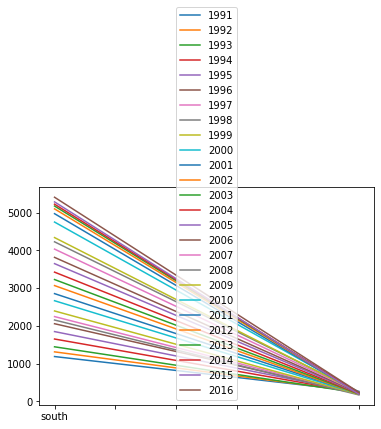

In [ ]:
# 선그래프 그리기
df_ns.plot() # 행과 열이 명확하지 않아 난리가 남

<AxesSubplot:>

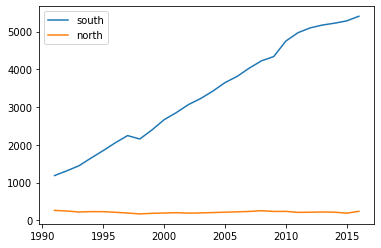

In [ ]:
# 행과 열을 전치하여 다시그리기 - 시계열 데이터
tdf_ns = df_ns.T
tdf_ns.plot()

<AxesSubplot:>

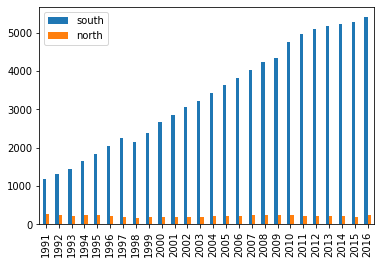

In [ ]:
tdf_ns.plot(kind="bar") # 막대그래프
# tdf_ns.plot(kind="hist")